In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def save_model(model, model_name):
    joblib.dump(model, f'{model_name}.joblib')
    print(f'Model {model_name} saved successfully.')

def load_model(model_name):
    loaded_model = joblib.load(f'{model_name}.joblib')
    return loaded_model

In [ ]:
data = pd.read_csv('/Sleep_health_and_lifestyle_dataset.csv')
print(data)
unique_bmi_categories = data['BMI Category'].unique()
print(unique_bmi_categories)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [ ]:

data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True)
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
data.drop(columns=['Person ID', 'Blood Pressure','Systolic_BP','Diastolic_BP'], inplace=True)
heart_rate_bins = [0, 60, 80, 100, float('inf')]
heart_rate_labels = ['Faible', 'Modéré', 'Élevé', 'Très élevé']
data['Heart Rate Category'] = pd.cut(data['Heart Rate'], bins=heart_rate_bins, labels=heart_rate_labels)

sleep_duration_bins = [0, 5, 7, 9, float('inf')]
sleep_duration_labels = ['Très court', 'Court', 'Normal', 'Long']
data['Sleep Duration Category'] = pd.cut(data['Sleep Duration'], bins=sleep_duration_bins, labels=sleep_duration_labels)

age_bins = [0, 18, 30, 50, 70, float('inf')]
age_labels = ['Enfant', 'Jeune adulte', 'Adulte', 'Senior', 'Super Senior']
data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

data.drop(columns=['Sleep Duration','Heart Rate','Age', 'Occupation'], inplace=True)
print(data.head())
data.head(500)

  Gender  Quality of Sleep  Physical Activity Level  Stress Level  \
0   Male                 6                       42             6   
1   Male                 6                       60             8   
2   Male                 6                       60             8   
3   Male                 4                       30             8   
4   Male                 4                       30             8   

  BMI Category  Daily Steps Sleep Disorder Heart Rate Category  \
0   Overweight         4200            NaN              Modéré   
1       Normal        10000            NaN              Modéré   
2       Normal        10000            NaN              Modéré   
3        Obese         3000    Sleep Apnea               Élevé   
4        Obese         3000    Sleep Apnea               Élevé   

  Sleep Duration Category  Age Category  
0                   Court  Jeune adulte  
1                   Court  Jeune adulte  
2                   Court  Jeune adulte  
3                   

,Gender,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate Category,Sleep Duration Category,Age Category
0,Male,6,42,6,Overweight,4200,NaN,Modéré,Court,Jeune adulte
1,Male,6,60,8,Normal,10000,NaN,Modéré,Court,Jeune adulte
2,Male,6,60,8,Normal,10000,NaN,Modéré,Court,Jeune adulte
3,Male,4,30,8,Obese,3000,Sleep Apnea,Élevé,Court,Jeune adulte
4,Male,4,30,8,Obese,3000,Sleep Apnea,Élevé,Court,Jeune adulte
...,...,...,...,...,...,...,...,...,...,...
369,Female,9,75,3,Overweight,7000,Sleep Apnea,Modéré,Normal,Senior
370,Female,9,75,3,Overweight,7000,Sleep Apnea,Modéré,Normal,Senior
371,Female,9,75,3,Overweight,7000,Sleep Apnea,Modéré,Normal,Senior
372,Female,9,75,3,Overweight,7000,Sleep Apnea,Modéré,Normal,Senior


In [ ]:
label_encoders = {}
for col in ['Gender', 'BMI Category', 'Sleep Disorder','Sleep Duration Category','Age Category', 'Heart Rate Category']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
X = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# save encodeing
joblib.dump(label_encoders, 'label_encoders.joblib')
print('Label encoders saved successfully.')

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
print("0: Pas de trouble du sommeil\n1: Apnée du sommeil\n2: Insomnie'") 
print(classification_report(y_test, y_pred))

import joblib

# Entraînement du modèle (exemple)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Enregistrement du modèle
save_model(clf, 'sleep_disorder_model')


0: Pas de trouble du sommeil
1: Apnée du sommeil
2: Insomnie'
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.85      0.69      0.76        16
           2       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Model sleep_disorder_model saved successfully.


In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                           Gender  Quality of Sleep  Physical Activity Level  \
Gender                   1.000000         -0.291366                 0.001454   
Quality of Sleep        -0.291366          1.000000                 0.192896   
Physical Activity Level  0.001454          0.192896                 1.000000   
Stress Level             0.396018         -0.898752                -0.034134   
BMI Category            -0.339945         -0.303876                 0.075508   
Daily Steps             -0.014509          0.016791                 0.772723   
Sleep Disorder           0.161131          0.357477                 0.109225   
Heart Rate Category      0.089092         -0.199963                -0.070056   
Sleep Duration Category  0.014426          0.828615                 0.350014   
Age Category            -0.428964          0.478860                -0.123823   

                         Stress Level  BMI Category  Daily Steps  \
Gender                       0.396018     -0.339945

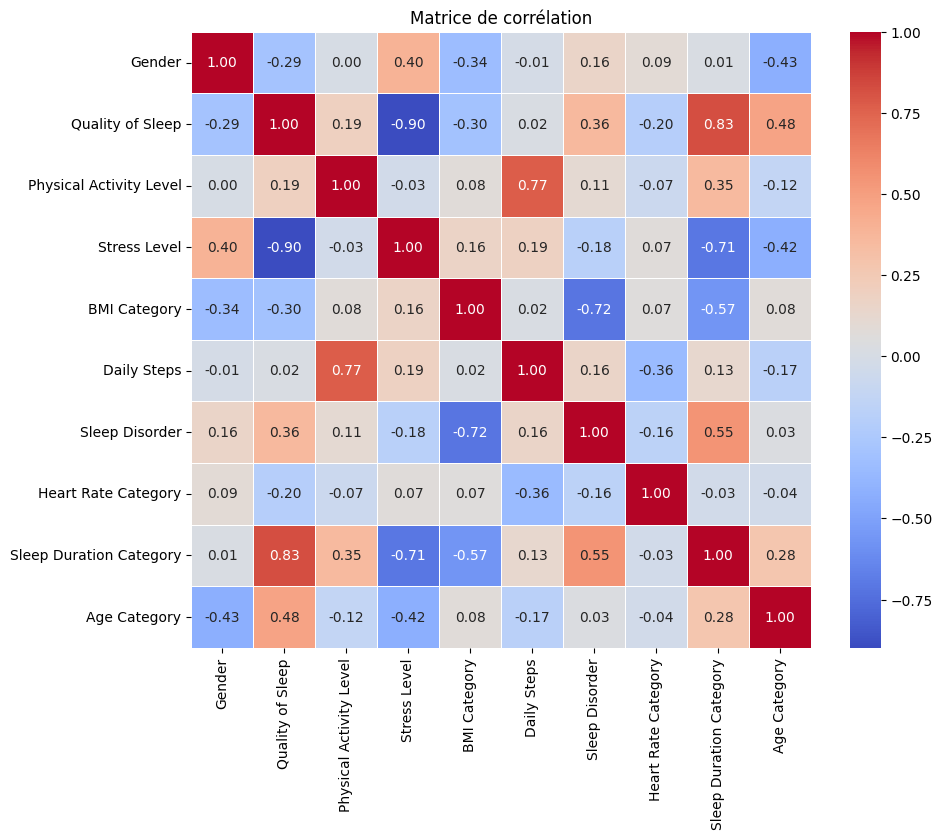

In [ ]:
label_encoders = {}
for col in ['Gender', 'BMI Category', 'Sleep Disorder']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
nouvelles_donnees = {
    'Gender': ['Female', 'Female', 'Male', 'Female', 'Male'],
    'Age': [23, 21, 25, 30, 45],
    #'Occupation': ['Doctor', 'Nurse', 'Engineer', 'Teacher', 'Sales Representative'],
    'Sleep Duration': [7.0, 7.5, 5.5, 6.0, 6.5],
    'Quality of Sleep': [7, 5, 3, 6, 5],
    'Physical Activity Level': [60, 40, 20, 50, 45],
    'Stress Level': [5, 7, 8, 4, 6],
    'BMI Category': ['Normal', 'Normal', 'Underweight', 'Overweight', 'Obese'],
    'Heart Rate': [72, 78, 65, 75, 80],
    'Daily Steps': [8000, 6000, 4000, 7000, 5000]
}


nouvelles_donnees_df = pd.DataFrame(nouvelles_donnees)
nouvelles_donnees_df['BMI Category'] = nouvelles_donnees_df['BMI Category'].replace('Normal Weight', 'Normal')
heart_rate_bins = [0, 60, 80, 100, float('inf')]
heart_rate_labels = ['Faible', 'Modéré', 'Élevé', 'Très élevé']
nouvelles_donnees_df['Heart Rate Category'] = pd.cut(nouvelles_donnees_df['Heart Rate'], bins=heart_rate_bins, labels=heart_rate_labels)
sleep_duration_bins = [0, 5, 7, 9, float('inf')]
sleep_duration_labels = ['Très court', 'Court', 'Normal', 'Long']
nouvelles_donnees_df['Sleep Duration Category'] = pd.cut(nouvelles_donnees_df['Sleep Duration'], bins=sleep_duration_bins, labels=sleep_duration_labels)
age_bins = [0, 18, 30, 50, 70, float('inf')]  # Intervalles pour age
age_labels = ['Enfant', 'Jeune adulte', 'Adulte', 'Senior', 'Super Senior']
nouvelles_donnees_df['Age Category'] = pd.cut(nouvelles_donnees_df['Age'], bins=age_bins, labels=age_labels)
nouvelles_donnees_df.drop(columns=['Sleep Duration','Heart Rate','Age'], inplace=True)
nouvelles_donnees_df.head()

,Gender,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Heart Rate Category,Sleep Duration Category,Age Category
0,Female,7,60,5,Normal,8000,Modéré,Court,Jeune adulte
1,Female,5,40,7,Normal,6000,Modéré,Normal,Jeune adulte
2,Male,3,20,8,Underweight,4000,Modéré,Court,Jeune adulte
3,Female,6,50,4,Overweight,7000,Modéré,Court,Jeune adulte
4,Male,5,45,6,Obese,5000,Modéré,Court,Adulte


In [ ]:
for col in ['Gender', 'BMI Category', 'Sleep Duration Category', 'Age Category', 'Heart Rate Category']:
    label_encoders[col] = LabelEncoder()
    nouvelles_donnees_df[col] = label_encoders[col].fit_transform(nouvelles_donnees_df[col])

In [ ]:
predictions = clf.predict(nouvelles_donnees_df)
trouble_du_sommeil_dict = {
    0: 'Pas de trouble du sommeil',
    1: 'Apnée du sommeil',
    2: 'Insomnie'
}
predictions_labels = [trouble_du_sommeil_dict[prediction] for prediction in predictions]
for i, prediction in enumerate(predictions_labels):
    print(f"Personne {i+1}: {prediction}")

Personne 1: Insomnie
Personne 2: Insomnie
Personne 3: Apnée du sommeil
Personne 4: Insomnie
Personne 5: Pas de trouble du sommeil


In [ ]:
nouvelles_donnees = {}

# Demander le genre
genre = input("Bonjour! Êtes-vous un homme ou une femme? Entrez 'Male' pour homme ou 'Female' pour femme: ")
nouvelles_donnees['Gender'] = [genre]

# Demander l'âge
age = int(input("Merci! Quel âge avez-vous? Entrez votre âge en chiffres: "))
nouvelles_donnees['Age'] = [age]

# Demander la durée du sommeil
sleep_duration = float(input("Pourriez-vous me dire combien d'heures de sommeil vous obtenez en moyenne chaque nuit? Entrez le nombre d'heures (par exemple, 7.5): "))
nouvelles_donnees['Sleep Duration'] = [sleep_duration]

# Demander la qualité du sommeil
quality_of_sleep = int(input("Sur une échelle de 1 à 10, à quel point diriez-vous que votre qualité de sommeil est généralement? Entrez un nombre entre 1 et 10: "))
nouvelles_donnees['Quality of Sleep'] = [quality_of_sleep]

# Demander le niveau d'activité physique
activity_level = int(input("Sur une échelle de 10 à 75 semaine (10 déplacement quotidien 75 activité frequente et intance)?: "))
nouvelles_donnees['Physical Activity Level'] = [activity_level]

# Demander le niveau de stress
stress_level = int(input("Sur une échelle de 1 à 10, à quel point vous sentez-vous généralement stressé? Entrez un nombre entre 1 et 10: "))
nouvelles_donnees['Stress Level'] = [stress_level]

# Demander la catégorie BMI
bmi_category = input("Pourriez-vous me donner une idée de votre catégorie de poids? 'Overweight' 'Normal' 'Obese' 'Normal Weight': ")
nouvelles_donnees['BMI Category'] = [bmi_category]

# Demander le rythme cardiaque moyen
heart_rate = int(input("Et quel est votre rythme cardiaque moyen par minute? Entrez le nombre de battements par minute: "))
nouvelles_donnees['Heart Rate'] = [heart_rate]

# Demander le nombre de pas par jour
daily_steps = int(input("Enfin, combien de pas faites-vous en moyenne chaque jour? Entrez le nombre de pas: "))
nouvelles_donnees['Daily Steps'] = [daily_steps]

print("Merci pour les informations!")


Bonjour! Êtes-vous un homme ou une femme? Entrez 'Male' pour homme ou 'Female' pour femme:  
Merci! Quel âge avez-vous? Entrez votre âge en chiffres:  


ValueError: invalid literal for int() with base 10: ''

In [ ]:
nouvelles_donnees_df = pd.DataFrame(nouvelles_donnees)
heart_rate_bins = [0, 60, 80, 100, float('inf')]
nouvelles_donnees_df['BMI Category'] = nouvelles_donnees_df['BMI Category'].replace('Normal Weight', 'Normal')
heart_rate_labels = ['Faible', 'Modéré', 'Élevé', 'Très élevé']
nouvelles_donnees_df['Heart Rate Category'] = pd.cut(nouvelles_donnees_df['Heart Rate'], bins=heart_rate_bins, labels=heart_rate_labels)
sleep_duration_bins = [0, 5, 7, 9, float('inf')]
sleep_duration_labels = ['Très court', 'Court', 'Normal', 'Long']
nouvelles_donnees_df['Sleep Duration Category'] = pd.cut(nouvelles_donnees_df['Sleep Duration'], bins=sleep_duration_bins, labels=sleep_duration_labels)
age_bins = [0, 18, 30, 50, 70, float('inf')]  # Intervalles pour age
age_labels = ['Enfant', 'Jeune adulte', 'Adulte', 'Senior', 'Super Senior']
nouvelles_donnees_df['Age Category'] = pd.cut(nouvelles_donnees_df['Age'], bins=age_bins, labels=age_labels)
nouvelles_donnees_df.drop(columns=['Sleep Duration','Heart Rate','Age'], inplace=True)
nouvelles_donnees_df.head()

In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lime, mapclassify, mlxtend, nilearn, pyLDAvis, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick


In [ ]:
for col in ['Gender', 'BMI Category', 'Heart Rate Category', 'Sleep Duration Category', 'Age Category']:
    label_encoders[col] = LabelEncoder()
    nouvelles_donnees_df[col] = label_encoders[col].fit_transform(nouvelles_donnees_df[col])
    
predictions = clf.predict(nouvelles_donnees_df)
trouble_du_sommeil_dict = {
    0: 'Pas de trouble du sommeil',
    1: 'Apnée du sommeil',
    2: 'Insomnie'
}
predictions_labels = [trouble_du_sommeil_dict[prediction] for prediction in predictions]
for i, prediction in enumerate(predictions_labels):
    print(f"Personne {i+1}: {prediction}")

In [ ]:
save_model(clf, 'random_forest_classifier')